In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pes-ec-mi-competition-a/sample_submission.csv
/kaggle/input/pes-ec-mi-competition-a/train.csv
/kaggle/input/pes-ec-mi-competition-a/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from IPython import display
from IPython.display import clear_output

import os
import glob
import imageio
import time
import IPython.display as ipd

import librosa
import librosa.display
import warnings

from matplotlib import image
from PIL import Image
import seaborn as sns
# warnings.filterwarnings('ignore')

In [3]:
import pandas as pd


train_data=pd.read_csv('/kaggle/input/pes-ec-mi-competition-a/train.csv')
train_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


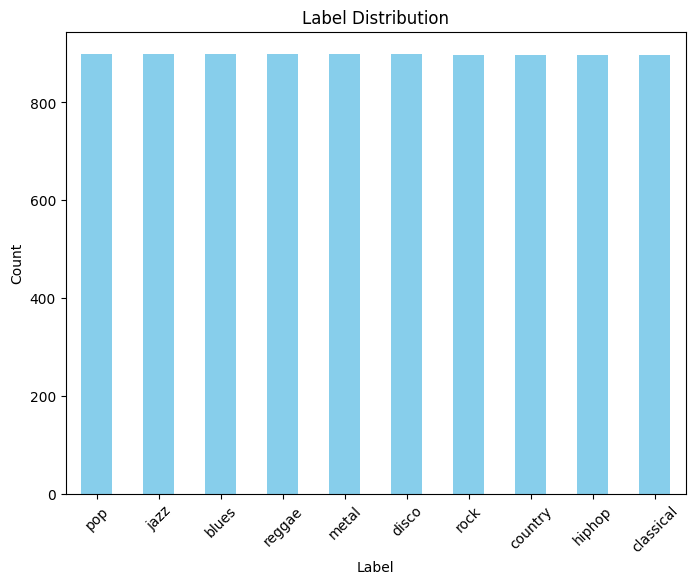

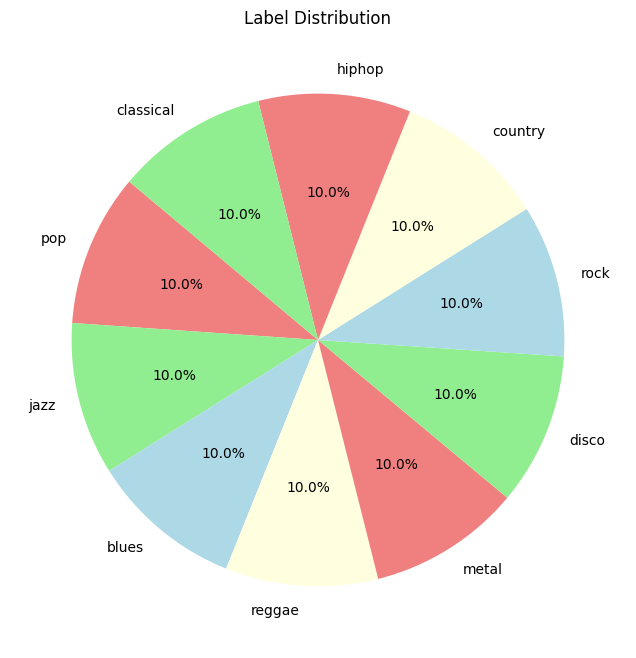

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
label_counts = train_data['label'].value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])
plt.title('Label Distribution')
plt.show()


In [5]:
train_data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 8991 non-null   object 
 1   length                   8991 non-null   int64  
 2   chroma_stft_mean         8991 non-null   float64
 3   chroma_stft_var          8991 non-null   float64
 4   rms_mean                 8991 non-null   float64
 5   rms_var                  8991 non-null   float64
 6   spectral_centroid_mean   8991 non-null   float64
 7   spectral_centroid_var    8991 non-null   float64
 8   spectral_bandwidth_mean  8991 non-null   float64
 9   spectral_bandwidth_var   8991 non-null   float64
 10  rolloff_mean             8991 non-null   float64
 11  rolloff_var              8991 non-null   float64
 12  zero_crossing_rate_mean  8991 non-null   float64
 13  zero_crossing_rate_var   8991 non-null   float64
 14  harmony_mean            

In [7]:
print("Dataset has",train_data.shape)
print("Count of Positive and Negative samples")
train_data.label.value_counts().reset_index()

Dataset has (8991, 60)
Count of Positive and Negative samples


,label,count
0,pop,900
1,jazz,900
2,blues,900
3,reggae,900
4,metal,900
5,disco,899
6,rock,898
7,country,898
8,hiphop,898
9,classical,898


In [8]:
data = train_data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

In [9]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [10]:
X = pd.DataFrame(X_scaled, columns = X.columns)

In [11]:
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.938806,-0.534943,1.416067,1.412371,-0.061249,-0.193608,0.094577,1.804104,-0.067081,...,0.149844,-0.397863,0.834559,-0.212302,0.463508,-0.544792,0.626662,-0.112628,-0.432037,-0.690829
1,0.0,-1.381340,0.539870,-0.804350,-0.126370,-1.009760,-0.799161,-1.302596,-0.387091,-1.162558,...,-0.442324,-0.594699,0.607363,1.468871,0.407816,2.731073,1.110634,0.393779,-0.142875,-0.082354
2,0.0,1.202256,-1.965415,-0.165917,-0.314313,-0.202099,-0.654755,-0.366581,-0.458655,-0.153482,...,0.606106,-0.616348,-0.070779,-0.747204,-0.288627,-0.497107,0.037478,-0.397828,1.398114,-0.151635
3,0.0,0.678564,-1.340537,-0.328987,-0.332858,0.045747,-0.659720,-0.316714,-0.546797,-0.043070,...,0.366958,-0.477460,-0.247045,-0.622704,0.604932,-0.877447,0.056073,-0.674468,0.276329,-0.689041
4,0.0,-0.107463,0.595163,-1.153860,-0.711439,-0.565134,-0.804451,0.196800,-0.655031,-0.061053,...,2.174370,-0.055291,0.084385,-0.118991,0.545347,0.454054,0.488512,0.734607,0.529983,1.084430


In [12]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principal_final = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3'])

In [13]:
Df = pd.concat([principal_final, y], axis = 1)
Df.head()


,PC1,PC2,PC3,label
0,1.766553,-1.322360,-2.650663,pop
1,-0.107447,3.825955,1.331396,jazz
2,-3.090197,-1.492301,-0.135717,disco
3,-4.399160,-1.464211,0.657151,rock
4,-1.969434,1.255899,2.858729,jazz


Text(0, 0.5, 'Principal Component 2')

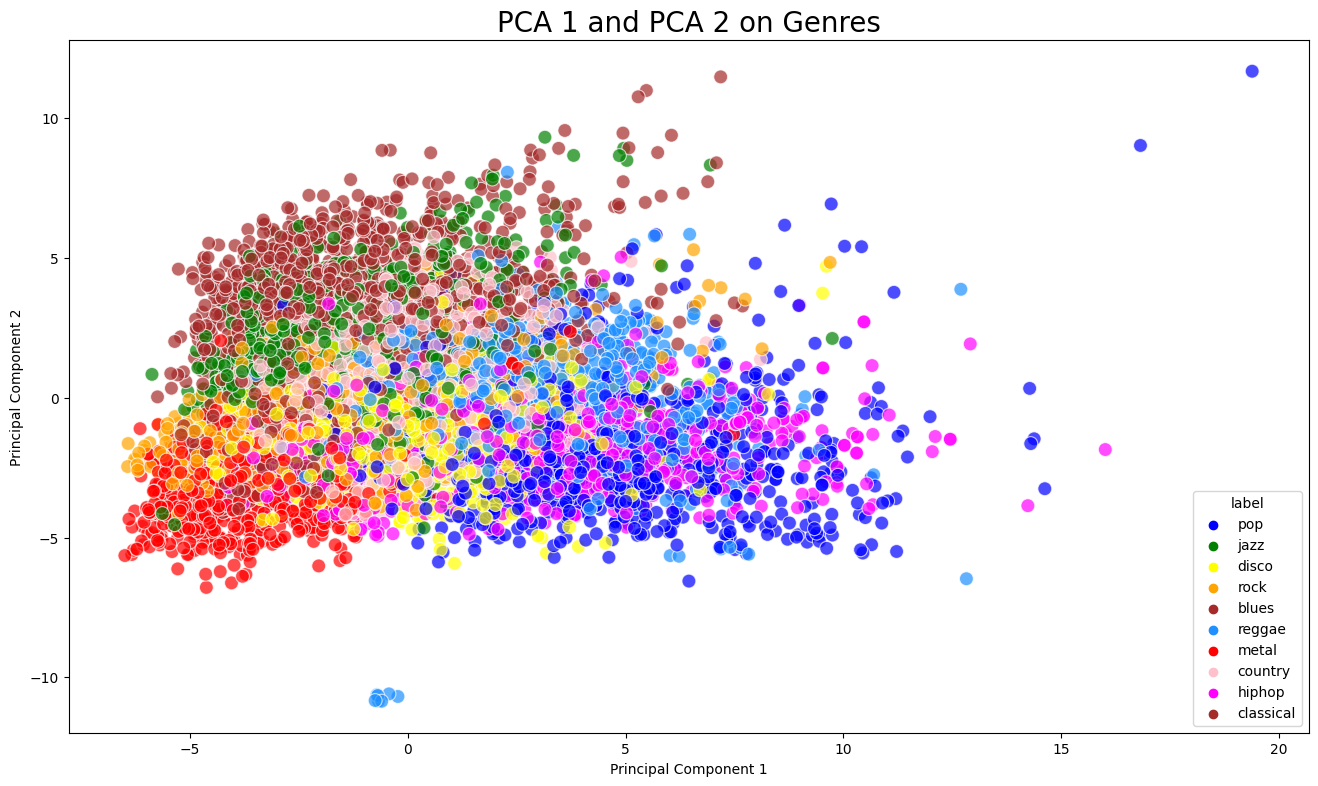

In [14]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC2", data =Df, hue = "label",palette=['blue','green','yellow','orange','brown','dodgerblue','red','pink','magenta','brown'], legend='full', alpha = 0.7, s = 100);

plt.title('PCA 1 and PCA 2 on Genres', fontsize = 20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Text(0, 0.5, 'Principal Component 3')

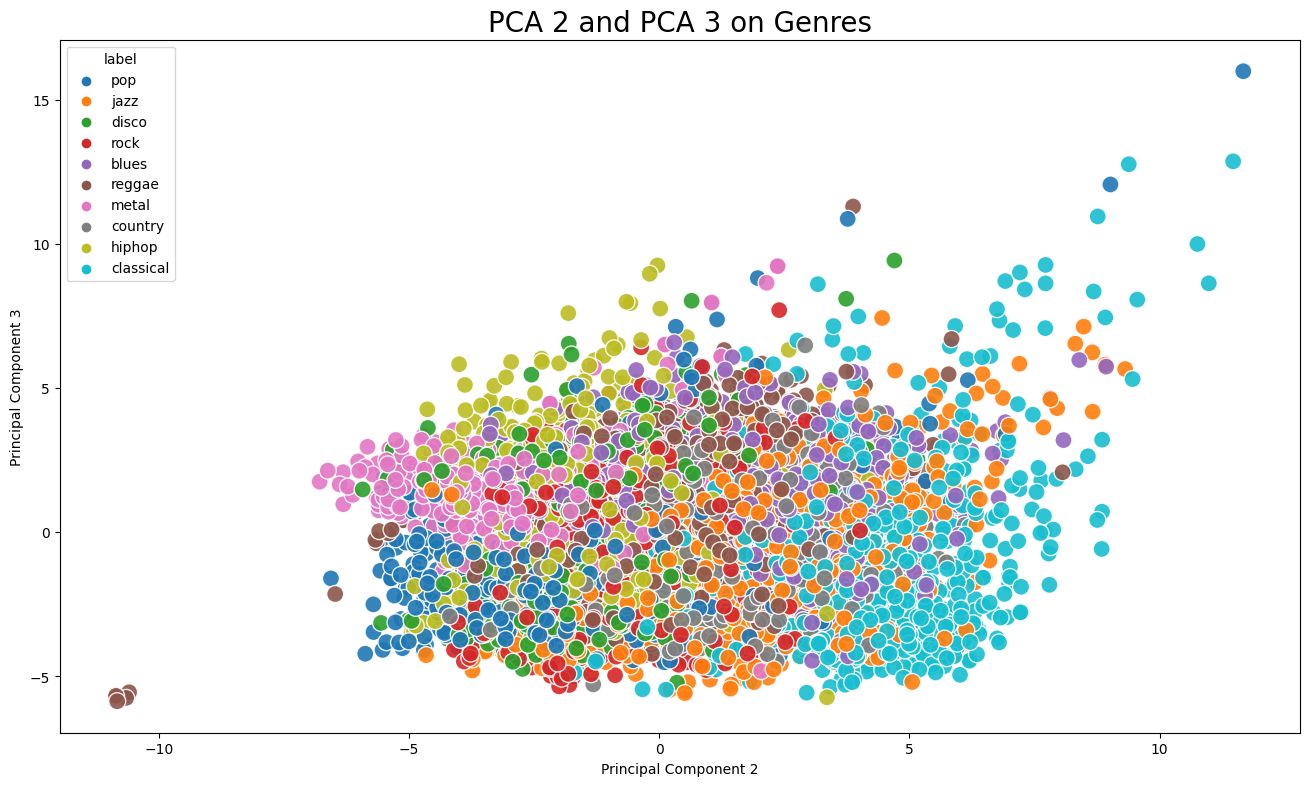

In [15]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC2", y = "PC3", data = Df, hue = "label", alpha = 0.9, s = 150);
plt.title('PCA 2 and PCA 3 on Genres', fontsize = 20)
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")

Text(0, 0.5, 'Principal Component 3')

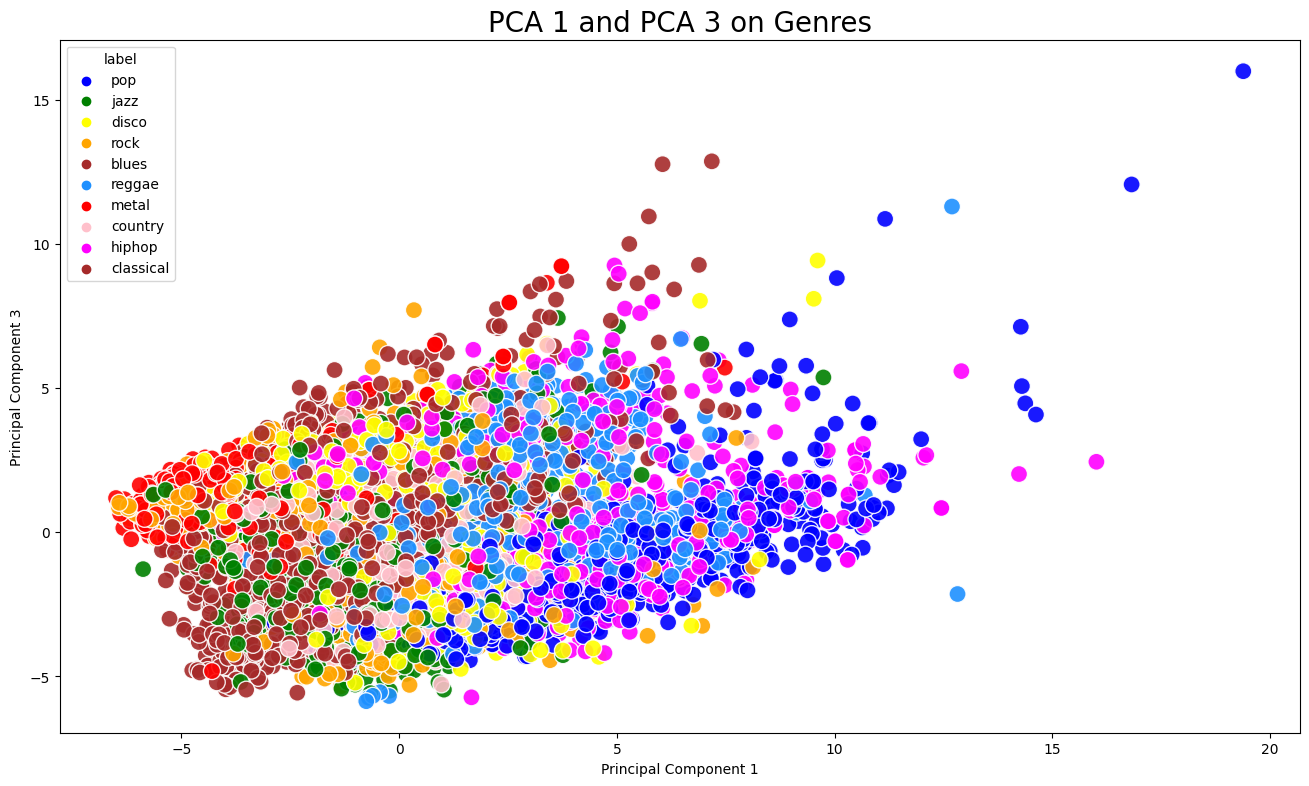

In [16]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC3", data = Df, hue = "label",palette=['blue','green','yellow','orange','brown','dodgerblue','red','pink','magenta','brown'], legend='full', alpha = 0.9, s = 150);
plt.title('PCA 1 and PCA 3 on Genres', fontsize = 20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

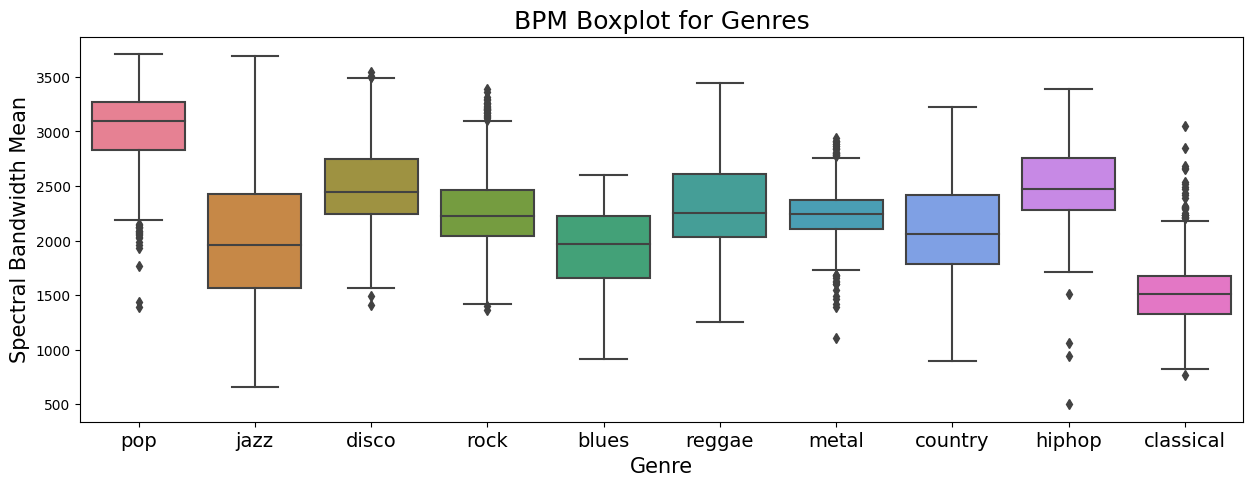

In [17]:
x = train_data[["label", "spectral_bandwidth_mean"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Spectral Bandwidth Mean", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

/tmp/ipykernel_20/2297962682.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


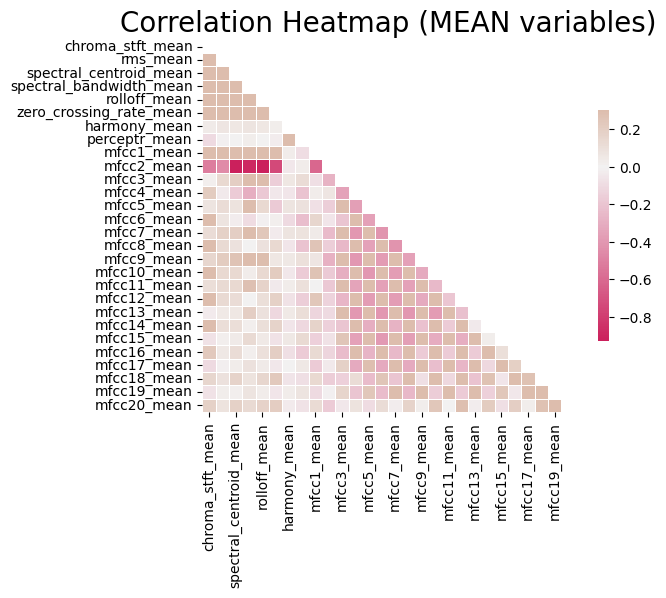

In [18]:
spike_cols = [col for col in train_data.columns if 'mean' in col]
corr = train_data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting Classifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [20]:
# Load the training and test data
train_data = pd.read_csv('/kaggle/input/pes-ec-mi-competition-a/train.csv')
test_data = pd.read_csv('/kaggle/input/pes-ec-mi-competition-a/test.csv')

In [21]:
from sklearn.model_selection import train_test_split

# Split the training data into features and labels
X = train_data.iloc[:, 1:-1]  # Exclude 'filename' and 'label' columns
y = train_data['label']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train) 

RandomForestClassifier()

In [23]:
y_pred_train=Rf.predict(X_train)
y_pred_test=Rf.predict(X_val)


In [24]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae','rock'],  yticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae','rock'] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [25]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(Rf.score(X_train,y_train)))

print("Test set score: {:.4f}".format(Rf.score(X_val,y_val)))

Training set score: 0.9990
Test set score: 0.8638


In [26]:
# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb = xgb.XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1)
gb_model.fit(X_train, y_train)


# Make predictions on the validation set
val_predictions = gb_model.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy (Gradient Boosting): {val_accuracy}")

Validation Accuracy (Gradient Boosting): 0.8198999444135631


In [27]:
# Use the trained model to make predictions on the test data
X_test = scaler.transform(test_data.iloc[:, :-1])  # Exclude 'id' column
test_predictions = gb_model.predict(X_test)


In [28]:
# Create a mapping dictionary
genre_mapping = {
    'blues': 0,
    'classical': 1,
    'country': 2,
    'disco': 3,
    'hiphop': 4,
    'jazz': 5,
    'metal': 6,
    'pop': 7,
    'reggae': 8,
    'rock': 9
}


# Map the predicted genre names to numerical values
test_predictions = [genre_mapping[genre] for genre in test_predictions]

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'id': test_data['id'], 'label': test_predictions})
submission_df.to_csv('submission.csv', index=False)  # Save the predictions to a CSV file